In [1]:
from IVClassification import *
import numpy as np
import matplotlib.pyplot as plt

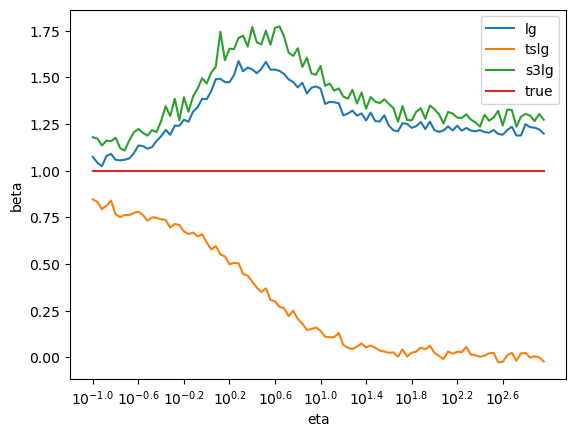

In [2]:
k = np.linspace(-1, 3, 100)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])
beta = 1

for eta in np.power(10, k):
    data = sim_data(n=10000, eta=eta, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    s3lg = three_stage_logit()
    s3lg.fit(data.X, data.Y, data.Z)
    s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
plt.plot(k, s3lg_coef, label='s3lg')
plt.plot(k, beta * np.ones(100), label='true')
plt.xticks(k[::10], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::10]])
plt.xlabel('eta')
plt.ylabel('beta')
plt.legend()